In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

In [2]:
# extrae los hashtags de un texto y devuelve una lista 
def hashtags(text):
    result = []
    for token in text.split():
        if token[0]=='#':
            result.append(token.replace('#', '').lower())
    return result    

text = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
hashtags(text)

['earthquake']

In [20]:
dataset['hashtags'] = dataset.text.apply(lambda x : hashtags(x))
dataset.head(5)

,keyword,location,text,target,longitud,hashtags
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,[earthquake]
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,[]
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,[]
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,[wildfires]
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,"[alaska, wildfires]"


In [51]:
# cantidad de registros que tienen hashtags
hashtags_count = dataset['hashtags'].apply(lambda x : len(x)!= 0).value_counts().reset_index()
hashtags_count.columns = ['Tipo', 'Cantidad']
hashtags_count.Tipo = ['Tweets sin hashtags', 'Tweets con hashtags']
hashtags_count

,Tipo,Cantidad
0,Tweets sin hashtags,5879
1,Tweets con hashtags,1734


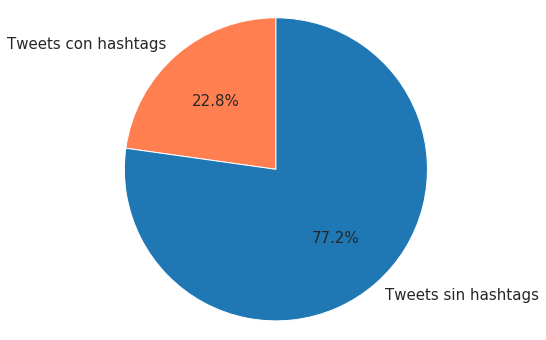

In [45]:
tweets_contains_hashtags = dataset['hashtags'].apply(lambda x : len(x)!= 0).reset_index()
tweets_with_hashtags = tweets_contains_hashtags.loc[tweets_contains_hashtags['hashtags'],'hashtags'].count()
tweets_without_hashtags = tweets_contains_hashtags.loc[tweets_contains_hashtags['hashtags']==False,'hashtags'].count()

labels = 'Tweets con hashtags', 'Tweets sin hashtags'
sizes = [tweets_with_hashtags, tweets_without_hashtags]
colors = ('coral','#1f77b4' )

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 15}, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [5]:
df_hashtags = dataset.explode('hashtags')
df_hashtags.head(10)

,keyword,location,text,target,longitud,hashtags
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,earthquake
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,NaN
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,NaN
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,wildfires
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,alaska
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,wildfires
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,rockyfire
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,cafire
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,True,110,wildfires


In [6]:
#veo cantidad de nulos
df_hashtags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 1 to 10873
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   9138 non-null   object
 1   location  6080 non-null   object
 2   text      9219 non-null   object
 3   target    9219 non-null   bool  
 4   longitud  9219 non-null   int64 
 5   hashtags  3340 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 441.1+ KB


In [8]:
top_hashtags = df_hashtags.hashtags.value_counts().reset_index()
top_hashtags.columns = ['hashtags','Cantidad']
top_hashtags.head()

,hashtags,Cantidad
0,news,72
1,prebreak,30
2,hot,30
3,best,30
4,???,23


In [12]:
top_hashtags.describe()


,Cantidad
count,1963.000000
mean,1.701477
std,2.628072
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,72.000000


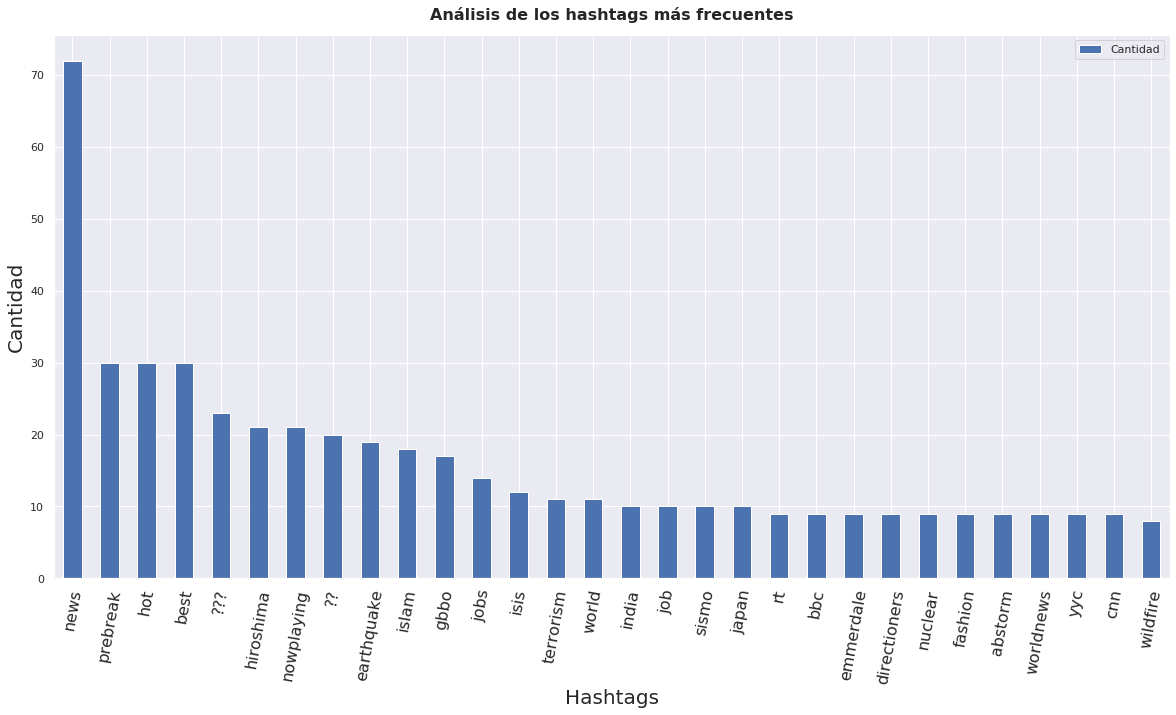

In [54]:

fig, ax = plt.subplots()


top_hashtags.nlargest(30,'Cantidad').plot(kind = 'bar', x='hashtags',y='Cantidad', ax = ax)

plt.xlabel("Hashtags",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 80) 
plt.title('Análisis de los hashtags más frecuentes',fontsize=16,fontweight='bold', pad = 15)



plt.show()